- Temperature (F) vs. Latitude
- Humidity (%) vs. Latitude
- Cloudiness (%) vs. Latitude
- Wind Speed (mph) vs. Latitude

Your final notebook must:

- Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
- Perform a weather check on each of the cities using a series of successive API calls.
- Include a print log of each city as it's being processed with the city number and city name.
- Save both a CSV of all data retrieved and png images for each scatter plot.

In [9]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time

In [10]:
# Step 1: Generate the Cities List by using citipy

# Generate random Latitudes & Longtitudes
Latitudes = np.random.uniform(low=-90, high=90, size=2000)
Latitudes = np.around(Latitudes, decimals=2)
Longtitudes = np.random.uniform(low=-180, high=180, size=2000)
Longtitudes = np.around(Longtitudes, decimals=2)
lat_lngs = list(zip(Latitudes, Longtitudes))

# Generate city names from citipy
cities = []
for x in lat_lngs:
    city = citipy.nearest_city(x[0], x[1]).city_name
    cities.append(city)
    
# remove the duplicate cities    
cities = list(set(cities))

In [11]:
# Step 2: Inquery the cities' info by accessing OpenWeather API
#Insert API key
APIKEY = "34ea1ff170ee69599cdcc03b86b7d71d"

# Build up Query url 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + APIKEY

# Creat empty lists
country = []
city_name = []
date = []
humidity = []
cloudiness = []
max_temp = []
min_temp = []
wind_speed = []
lat = []
lng = []

# get response from API
for city in cities:
    try:
        response = requests.get(f"{url}&q={city}").json()
        country.append(response['sys']['country'])
        city_name.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response["clouds"]["all"])
        max_temp.append(response["main"]["temp_max"])
        min_temp.append(response["main"]["temp_min"])
        wind_speed.append(response["wind"]["speed"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        city_record = response["name"]
        print(f"Processing {city_record}")
        time.sleep(1.05)
        
    except:
        print("City not Found.")
    continue
        

Processing Half Moon Bay
Processing Padang
Processing Codrington
Processing Frontera
Processing Opunake
City not Found.
Processing Santa Cruz de la Palma
Processing Pangai
Processing Vila Franca do Campo
Processing Maniitsoq
Processing Challans
Processing Dhidhdhoo
Processing Pisco
Processing Zhezkazgan
Processing Halvad
Processing Kidal
Processing Beaumont
Processing Mirnyy
Processing Luanda
Processing Nosy Varika
Processing Biltine
City not Found.
Processing Qarqin
Processing North Bend
City not Found.
Processing Avarua
Processing Nicoya
Processing Mehamn
Processing Manggar
City not Found.
Processing Seymchan
City not Found.
Processing Talas
Processing Longyearbyen
Processing Saskylakh
Processing Pangoa
Processing Port Hardy
City not Found.
Processing Conceicao do Araguaia
City not Found.
Processing Teguise
Processing Kupang
Processing Kodiak
Processing Broome
Processing Ojinaga
Processing Cayenne
Processing Byron Bay
Processing Puerto Ayacucho
Processing Kasongo-Lunda
Processing Bam

Processing Daru
Processing Reconquista
Processing Broken Hill
Processing Blyth
Processing Torbay
Processing Parati
Processing Mnogovershinnyy
Processing Wamba
Processing Jiuquan
Processing Lagoa
City not Found.
Processing Salalah
Processing Parabel
Processing Kudahuvadhoo
Processing Isangel
Processing Kirkland Lake
Processing Aranos
City not Found.
Processing Ponta do Sol
Processing Raudeberg
City not Found.
Processing Tirumullaivasal
Processing Umm Lajj
Processing Plettenberg Bay
City not Found.
Processing Nhulunbuy
Processing Leiyang
Processing Bermeo
Processing Languyan
Processing Anchorage
Processing Turinsk
City not Found.
Processing King City
City not Found.
Processing Masaka
Processing Parrita
Processing Shizunai
Processing Barra Patuca
Processing Rognan
Processing College
City not Found.
Processing Barrow
Processing Itarema
Processing Mareeba
Processing Primorsk
Processing Varkaus
Processing Bukachacha
Processing Hirara
Processing Comodoro Rivadavia
City not Found.
Processing T

In [14]:
# Step 3: Create a new dataframe 

weather_api = {
    
    "City": city_name,
    "Country":country,
    "Date":date, 
    "Cloudiness":cloudiness, 
    "Lat":lat, 
    "Lng":lng, 
    "Humidity": humidity,
    "Wind Speed":wind_speed,
    "Max Temp": max_temp,
    "Min Temp": min_temp
}

# Create a dataframe for the collection data
weather_df = pd.DataFrame(weather_api)

weather_df.info()
# save dataframe to csv
weather_df.to_csv("output_csv/weather_df.csv")

# display the dataframe
weather_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 10 columns):
City          680 non-null object
Country       680 non-null object
Date          680 non-null int64
Cloudiness    680 non-null int64
Lat           680 non-null float64
Lng           680 non-null float64
Humidity      680 non-null int64
Wind Speed    680 non-null float64
Max Temp      680 non-null float64
Min Temp      680 non-null float64
dtypes: float64(5), int64(3), object(2)
memory usage: 53.2+ KB


,City,Country,Date,Cloudiness,Lat,Lng,Humidity,Wind Speed,Max Temp,Min Temp
0,US,US,1572985103,90,37.46,-122.43,93,10.29,79.00,51.80
1,ID,ID,1572985288,100,-0.92,100.36,87,1.48,64.62,64.62
2,AU,AU,1572985290,0,-28.95,153.24,81,6.93,60.80,51.80
3,MX,MX,1572985291,75,18.53,-92.64,70,8.05,84.20,84.20
4,NZ,NZ,1572985292,88,-39.45,173.86,80,5.01,63.00,55.99


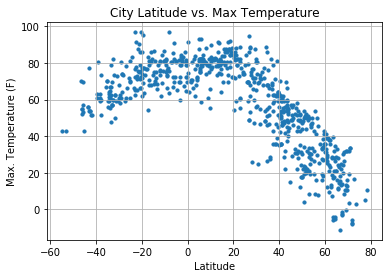

In [16]:
# Step 4: plotting the relationship

# Temperature (F) vs. Latitude

plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", s=10)

plt.title('City Latitude vs. Max Temperature')
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

plt.show()

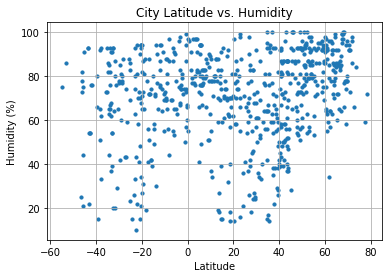

In [18]:
# Humidity (%) vs. Latitude
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", s=10)

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Output_Plots/Humidity_vs_Latitude.png")

plt.show()

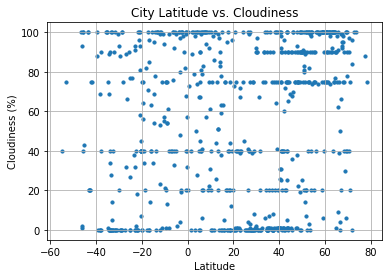

In [19]:
# Cloudiness (%) vs. Latitude
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", s=10)

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Output_Plots/Cloudiness_vs_Latitude.png")

plt.show()

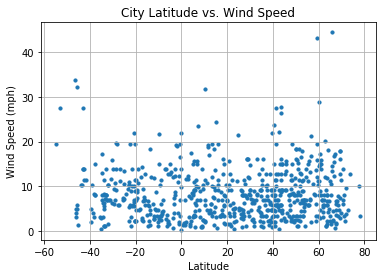

In [20]:
# Wind Speed (mph) vs. Latitude
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", s=10)

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Output_Plots/Wind_Speed_vs_Latitude.png")

plt.show()